# テーマ2

# NG_特定のカラムだけにする

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルを読み込む
df = pd.read_csv('train.csv')

# ヘッダー行から列名を動的に取得する
column_names_to_extract = ['1', '2', '3', '4', '5', '6', '15', '16', '17', '18', '23', '24']  # 必要な列名をリストで指定

# 動的に取得した列名を使ってデータを抽出する
extracted_columns = df[column_names_to_extract]

# 抽出したデータを新しいCSVファイルとして保存する
extracted_columns.to_csv('extracted_data.csv', index=False)

# ファイルが保存されたことを確認するためにメッセージを表示
print("Extracted data has been saved to extracted_data.csv")

Saving train.csv to train (5).csv


KeyError: "None of [Index(['1', '2', '3', '4', '5', '6', '15', '16', '17', '18', '23', '24'], dtype='object')] are in the [columns]"

# [不要]データ補完(湿度の補完) 降水量*50で100以内

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_train.csv')
# print(df)

# Handle rows where the 5th column is empty
df['Humidity3pm'] = df.apply(
    # lambda row: (int(row.iloc[3]) * 50) if pd.isnull(row.iloc[4]) else row.iloc[4],
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)
# Filter rows where the 5th column was filled (to avoid NaN values)
df = df[~pd.isnull(df['Humidity3pm'])]
# print(df)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_extracted_train.csv', index=False)

Saving extracted_train.csv to extracted_train.csv


# データ補完(湿度の補完) 降水量*50で100以内にしRainTodayを0,1変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_train.csv')

# 変換ルールを定義
conversion_map = {
    'No': 0,
    'Yes': 1
}

# Humidity3pmの空セルにRainfallの50倍の数値を入れる(最大値100)
df['Humidity3pm'] = df.apply(
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)

df = df[~pd.isnull(df['Humidity3pm'])]

# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_extracted_train.csv', index=False)

Saving extracted_train.csv to extracted_train.csv


<ipython-input-1-c681335d8c52>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


# test.csvを同じように変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_test.csv')

# 変換ルールを定義
conversion_map = {
    'No': 0,
    'Yes': 1
}

# Humidity3pmの空セルにRainfallの50倍の数値を入れる(最大値100)
df['Humidity3pm'] = df.apply(
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)

df = df[~pd.isnull(df['Humidity3pm'])]

# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_test.csv', index=False)

Saving extracted_test.csv to extracted_test (1).csv


<ipython-input-7-e933fd24a438>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


# 補完済みtrain.csvの訓練データ分割(8:2)(簡易)

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('light_hokann_extracted_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをTSVファイルとして保存:
train_df.to_csv('light_hokann_extracted_train8.csv', index=False)
val_df.to_csv('light_hokann_extracted_train2.csv', index=False)

# データの保存
files.download('light_hokann_extracted_train8.csv')
files.download('light_hokann_extracted_train2.csv')

Saving light_hokann_extracted_train.csv to light_hokann_extracted_train (4).csv
Training set size: 39
Validation set size: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補完済みtrain.csvの訓練データ分割

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('hokann_extracted_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをTSVファイルとして保存:
train_df.to_csv('hokann_extracted_train8.csv', index=False)
val_df.to_csv('hokann_extracted_train2.csv', index=False)

# データの保存
files.download('hokann_extracted_train8.csv')
files.download('hokann_extracted_train2.csv')

Saving hokann_extracted_train.csv to hokann_extracted_train.csv
Training set size: 67487
Validation set size: 16872


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# [NG]テーマ2 決定木モデル(検証)

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'hokann_extracted_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_train = train_data.iloc[1:, 6]    # 6カラム目が目的変数

# 各カラムのデータ型を出力
#print("=== Initial Data Types (X_train) ===")
#print(X_train)
#print("------")
#print(X_train.dtypes)

#print("=== Initial Data Types (y_train) ===")
#print(y_train)
#print("------")
#print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'hokann_extracted_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の3,4,5,カラム目を説明変数として取得（ヘッダを含まない）
test_data = test_data.iloc[1:, 3:6]  # 2行目以降を取得

# 各カラムのデータ型を出力
# print("=== Initial Data Types (train2) ===")
# print(test_data)
# print("------")
# print(test_data.dtypes)

# 新しいデータで目的変数を予測する
predictions = model.predict(test_data)

# 予測結果を出力する
# output = pd.DataFrame(predictions, columns=['Predicted'])
# output.to_csv('theme2_tree_model_predictions.csv', index=False)
# データの保存
# files.download('theme2_tree_model_predictions.csv')


Saving hokann_extracted_train2.csv to hokann_extracted_train2 (3).csv
Saving hokann_extracted_train8.csv to hokann_extracted_train8 (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Initial Data Types (train2) ===
       Rainfall  Humidity3pm  RainToday
1           2.4         45.0          1
2           0.0         60.0          0
3           0.0         34.0          0
4           0.0         39.0          0
5           0.0         49.0          0
...         ...          ...        ...
16867       0.0         54.0          0
16868       0.0         69.0          0
16869       0.0         33.0          0
16870       0.0         55.0          0
16871       0.0          0.0          0

[16871 rows x 3 columns]
------
Rainfall       float64
Humidity3pm    float64
RainToday        int64
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# テーマ2決定木モデル検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'hokann_extracted_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_train = train_data.iloc[1:, 6]    # 6カラム目が目的変数

# 各カラムのデータ型を出力
#print("=== Initial Data Types (X_train) ===")
#print(X_train)
#print("------")
#print(X_train.dtypes)

#print("=== Initial Data Types (y_train) ===")
#print(y_train)
#print("------")
#print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
#model_filename = 'int_theme2_tree_model.joblib'
#joblib.dump(model, model_filename)
# データの保存
#files.download('int_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'hokann_extracted_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の3,4,5,カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_val = test_data.iloc[1:, 6]    # 6カラム目が目的変数


# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving hokann_extracted_train2.csv to hokann_extracted_train2 (4).csv
Saving hokann_extracted_train8.csv to hokann_extracted_train8 (4).csv
Accuracy: 82.08%

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.95      0.89     13112
         Yes       0.68      0.37      0.48      3759

    accuracy                           0.82     16871
   macro avg       0.76      0.66      0.68     16871
weighted avg       0.80      0.82      0.80     16871


Confusion Matrix:
[[12471   641]
 [ 2383  1376]]


# 実践

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'int_theme2_tree_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'hokann_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得（4,5,6カラム目を使用）
X_test = test_data.iloc[0:, 3:6]  # 2行目以降の4-6カラム目を使用

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'theme2_tree_model_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('theme2_tree_model_result.csv')

Saving hokann_extracted_train.csv to hokann_extracted_train (1).csv
Saving hokann_test.csv to hokann_test (1).csv
Predictions saved to theme2_tree_model_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ー決定木モデルからランダムフォレストにしてみるー

# hokanから精度予測

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('hokann_extracted_train.csv')

# データを確認
print("Data Sample:")
print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8514
X = train_data[['Rainfall', 'Humidity3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データを確認
print("Data Sample:")
print(train_data.head())

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# テストデータと予測結果のサイズを確認
print(f"Size of y_test: {y_test.shape}")
print(f"Size of y_pred: {y_pred.shape}")

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving hokann_extracted_train.csv to hokann_extracted_train (2).csv
Data Sample:
            id       Date Location  Rainfall  Humidity3pm  RainToday  \
0  train_00000  2008/12/1   Albury       0.6         22.0          0   
1  train_00001  2008/12/2   Albury       0.0         25.0          0   
2  train_00002  2008/12/5   Albury       1.0         33.0          0   
3  train_00003  2008/12/6   Albury       0.2         23.0          0   
4  train_00004  2008/12/7   Albury       0.0         19.0          0   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  
Data Sample:
            id       Date Location  Rainfall  Humidity3pm  RainToday  \
0  train_00000  2008/12/1   Albury       0.6         22.0          0   
1  train_00001  2008/12/2   Albury       0.0         25.0          0   
2  train_00002  2008/12/5   Albury       1.0         33.0          0   
3  train_00003  2008/12/6   Albury       0.2         23.0          0   
4  train_00

# 別パターン1 精度向上せず

# K-fold

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from google.colab import files

# ローカルからCSVファイルをアップロード
uploaded = files.upload()

# CSVファイルを読み込む
data = pd.read_csv('hokann_extracted_train.csv')

# 説明変数と目的変数に分割
# ここでは、目的変数が最終列で、説明変数がそれ以外と仮定
# 必要に応じて適切にカラム名またはインデックスで調整してください
X = data.iloc[1:, 3:6]  # 説明変数
y = data.iloc[1:, 6]   # 目的変数

# 決定木モデルのインスタンス作成
clf = DecisionTreeClassifier(random_state=42)

# K-foldクロスバリデーションの設定
k = 5  # 例えば5-foldに設定
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# クロスバリデーションを実行し、各foldの精度を出力
scores = cross_val_score(clf, X, y, cv=kf)

# 結果の表示
print(f"{k}-fold クロスバリデーションの各スコア: {scores}")
print(f"平均精度: {scores.mean():.2f}")

Saving hokann_extracted_train.csv to hokann_extracted_train (3).csv
5-fold クロスバリデーションの各スコア: [0.81602655 0.81893077 0.81584874 0.8176753  0.81814949]
平均精度: 0.82


# 別パターン2 ランダムフォレスト

# ランダムフォレスト

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# CSVファイルを読み込む
data = pd.read_csv('hokann_extracted_train.csv')

# 説明変数と目的変数を定義
X = data[['Rainfall', 'Humidity3pm', 'RainToday']]
y = data['RainTomorrow']

# カテゴリ変数を適切に数値に変換
X['RainToday'] = X['RainToday'].map({'Yes': 1, 'No': 0})
y = y.map({'Yes': 1, 'No': 0})

# データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルのインスタンスを作成
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルを訓練
rf_model.fit(X_train, y_train)

# テストデータで予測
y_pred = rf_model.predict(X_test)

# 精度を出力
accuracy = accuracy_score(y_test, y_pred)
print(f"正答率: {accuracy:.2f}")

# 詳細な分類レポートを出力
print("\n分類レポート:")
print(classification_report(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'hokann_extracted_train.csv'

# -ここから新しいtrainの加工パターン-

# ptnB文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ptnB_train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_ptnB_train.csv', index=False)
files.download('int_ptnB_train.csv')

Saving ptnB_train.csv to ptnB_train (1).csv


<ipython-input-2-44986181cef2>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ptnBの8:2分割

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('int_ptnB_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをCSVファイルとして保存:
train_df.to_csv('int_ptnB_train8.csv', index=False)
val_df.to_csv('int_ptnB_train2.csv', index=False)

# データの保存
files.download('int_ptnB_train8.csv')
files.download('int_ptnB_train2.csv')


Saving int_ptnB_train.csv to int_ptnB_train (1).csv
Training set size: 36840
Validation set size: 9211


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 決定木モデル ptnB検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnB_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 2:13]  # 2-13目が説明変数
y_train = train_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_train) ===")
# print(X_train)
# print("------")
# print(X_train.dtypes)

# print("=== Initial Data Types (y_train) ===")
# print(y_train)
# print("------")
# print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_ptnB_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_ptnB_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'int_ptnB_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の2-13カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, 2:13]  # 2-13目が説明変数
y_val = test_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_val) ===")
# print(X_val)
# print("------")
# print(X_val.dtypes)

# print("=== Initial Data Types (y_val) ===")
# print(y_val)
# print("------")
# print(y_val.dtypes)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving int_ptnB_train2.csv to int_ptnB_train2.csv
Saving int_ptnB_train8.csv to int_ptnB_train8.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 78.14%

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86      7073
         Yes       0.53      0.53      0.53      2137

    accuracy                           0.78      9210
   macro avg       0.69      0.69      0.69      9210
weighted avg       0.78      0.78      0.78      9210


Confusion Matrix:
[[6073 1000]
 [1013 1124]]


# 特徴量調査

Saving kakou_int_ptnB_train.csv to kakou_int_ptnB_train.csv
特徴量の重要度:
Humidity3pm      0.307499
Pressure3pm      0.114479
WindGustSpeed    0.084915
MinTemp          0.080320
MaxTemp          0.070862
Temp3pm          0.066016
Location         0.058153
WindSpeed3pm     0.057318
Cloud3pm         0.054213
Rainfall         0.053092
WindDir3pm       0.051198
RainToday        0.001935
dtype: float64


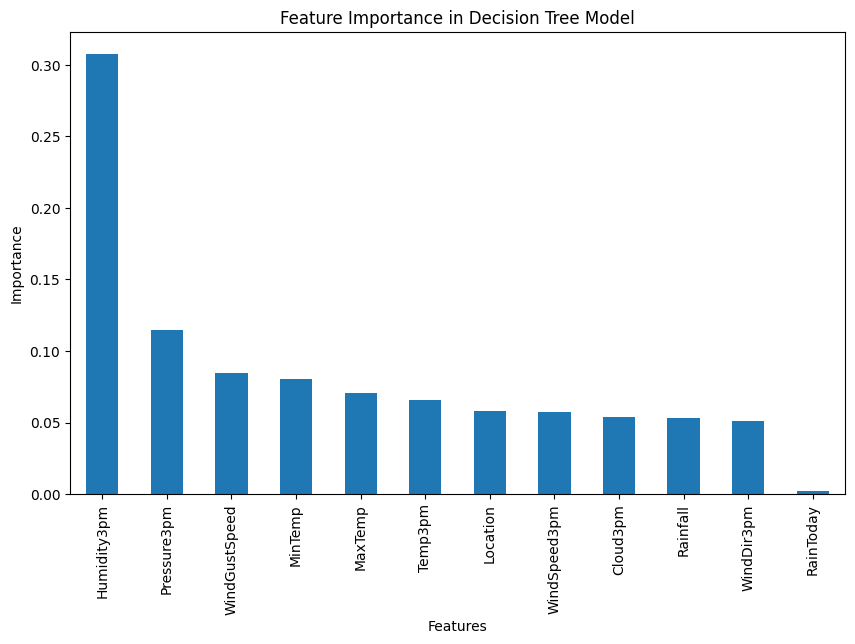

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'kakou_int_ptnB_train.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成
model = DecisionTreeClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 特徴量考慮したptnB検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnB_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, [2, 3, 4, 6, 8, 9, 10, 12]] # 特徴量考慮
y_train = train_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_train) ===")
# print(X_train)
# print("------")
# print(X_train.dtypes)

# print("=== Initial Data Types (y_train) ===")
# print(y_train)
# print("------")
# print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'tokutyou_int_ptnB_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('tokutyou_int_ptnB_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'int_ptnB_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の2-13カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, [2, 3, 4, 6, 8, 9, 10, 12]] # 特徴量考慮
y_val = test_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_val) ===")
# print(X_val)
# print("------")
# print(X_val.dtypes)

# print("=== Initial Data Types (y_val) ===")
# print(y_val)
# print("------")
# print(y_val.dtypes)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving int_ptnB_train2.csv to int_ptnB_train2 (2).csv
Saving int_ptnB_train8.csv to int_ptnB_train8 (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 78.00%

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.85      0.86      7073
         Yes       0.53      0.54      0.53      2137

    accuracy                           0.78      9210
   macro avg       0.69      0.70      0.69      9210
weighted avg       0.78      0.78      0.78      9210


Confusion Matrix:
[[6025 1048]
 [ 978 1159]]


# そもそもモデルを検討する

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルを定義
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 各モデルの精度を計算
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: Average Accuracy = {results[name]:.4f}")

# 結果を表示
print("\nModel Comparison:")
for name in results:
    print(f"{name}: {results[name]:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train.csv
Evaluating Decision Tree...
Decision Tree: Average Accuracy = 0.7823
Evaluating Random Forest...
Random Forest: Average Accuracy = 0.8503
Evaluating Gradient Boosting...
Gradient Boosting: Average Accuracy = 0.8486
Evaluating Support Vector Machine...
Support Vector Machine: Average Accuracy = 0.8362
Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Average Accuracy = 0.8421

Model Comparison:
Decision Tree: 0.7823
Random Forest: 0.8503
Gradient Boosting: 0.8486
Support Vector Machine: 0.8362
Logistic Regression: 0.8421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression深堀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化のためのスケーラーを初期化
scaler = StandardScaler()

# 訓練データを標準化
X_train_scaled = scaler.fit_transform(X_train)

# テストデータを標準化（訓練データでフィットしたスケーラーを使用）
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを初期化
model = LogisticRegression(max_iter=1000, random_state=42)

# モデルを訓練
model.fit(X_train_scaled, y_train)

# テストデータでの予測
y_pred = model.predict(X_test_scaled)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train.csv
Accuracy: 0.8458


# ランダムフォレストでどこまで削れるか

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('ext_int_ptnB_train.csv')

# データを確認
print("------")
print(train_data.columns)

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。
print("--aaa----")
print(train_data.columns)

# Accuracy: 0.8474
# X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm','WindSpeed3pm']]
# Accuracy: 0.8466
# X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm']]
# Accuracy: 0.8167
X = train_data[['Location', 'MinTemp', 'MaxTemp','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

ModuleNotFoundError: No module named 'missingpy'

# ランダムフォレスト仕切り直し

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train_scaled, y_train)

# モデルを保存する
model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test_scaled)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train (8).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8514


# ランダムフォレストで説明変数削減モデル

In [3]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '1202_int_ptnB_6param_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('1202_int_ptnB_6param_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8466


# 線形補間

In [4]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# CSVファイルからデータを読み込み
uploaded = files.upload()
data = pd.read_csv('1202_extracted_ptnB_test.csv')

# データの確認（最初の数行を確認して、欠損値がどこにあるかを確認）
print("Before interpolation:")
print(data.head())

# 線形補間を適用
data_interpolated = data.interpolate(method='linear')

# 補間後のデータを確認
print("\nAfter interpolation:")
print(data_interpolated.head())

# 必要に応じて、補間されたデータを新しいCSVとして保存
data_interpolated.to_csv('1202_ext_test_interpolated.csv', index=False)

Saving 1202_extracted_ptnB_test.csv to 1202_extracted_ptnB_test.csv
Before interpolation:
           id        Date Location  MinTemp  MaxTemp  WindGustSpeed  \
0  test_00000   2008/12/4   Albury      9.2     28.0           24.0   
1  test_00001   2008/12/9   Albury      9.7     31.9           80.0   
2  test_00002  2008/12/14   Albury     12.6     21.0           44.0   
3  test_00003  2008/12/19   Albury     11.2     22.5           43.0   
4  test_00004  2008/12/24   Albury     15.3     30.9           33.0   

   Humidity3pm  Pressure3pm RainToday  
0         16.0       1012.8        No  
1          9.0       1003.6        No  
2         43.0       1001.8       Yes  
3         32.0       1009.7       Yes  
4         23.0       1008.2        No  

After interpolation:
           id        Date Location  MinTemp  MaxTemp  WindGustSpeed  \
0  test_00000   2008/12/4   Albury      9.2     28.0           24.0   
1  test_00001   2008/12/9   Albury      9.7     31.9           80.0   
2  test_

<ipython-input-4-5d9209a89b3f>:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear')


# 補完後データの文字列変換

In [5]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('1202_ext_test_interpolated.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('1202_int_ext_test_interpolated.csv', index=False)
files.download('1202_int_ext_test_interpolated.csv')

Saving 1202_ext_test_interpolated.csv to 1202_ext_test_interpolated (1).csv


<ipython-input-5-6c5da574d982>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補間後ランダムフォレスト実践

In [6]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1202_int_ptnB_6param_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = '1202_int_ext_test_interpolated.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
print("---test_data---")
print(test_data)

# 2行目から説明変数を取得（2-8カラム目を使用）
X_test = test_data.iloc[0:, 2:8]  # 2行目以降の4-6カラム目を使用

### デバッグ
print("---X_test---")
print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1202_ptnB_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1202_ptnB_theme2_randomforest_result.csv')

Saving 1202_int_ext_test_interpolated.csv to 1202_int_ext_test_interpolated (1).csv
---test_data---
               id        Date  Location  MinTemp  MaxTemp  WindGustSpeed  \
0      test_00000   2008/12/4         1      9.2     28.0           24.0   
1      test_00001   2008/12/9         1      9.7     31.9           80.0   
2      test_00002  2008/12/14         1     12.6     21.0           44.0   
3      test_00003  2008/12/19         1     11.2     22.5           43.0   
4      test_00004  2008/12/24         1     15.3     30.9           33.0   
...           ...         ...       ...      ...      ...            ...   
28188  test_28188   2017/5/31        36      5.4     20.5           46.0   
28189  test_28189    2017/6/5        36      4.9     20.7           37.0   
28190  test_28190   2017/6/10        36      3.2     18.6           46.0   
28191  test_28191   2017/6/15        36      2.6     22.5           19.0   
28192  test_28192   2017/6/20        36      3.5     21.8       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# [うまくいかん]なんか回答部分も0,1変換されてるので戻す

In [25]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
# uploaded = files.upload()

# CSVファイルの読み込み
# df = pd.read_csv('1202_ptnB_theme2_randomforest_result.csv', header=None)  # 'your_file.csv'を実際のファイル名に置き換えてください
df = pd.read_csv('1202_ptnB_theme2_randomforest_result.csv')  # 'your_file.csv'を実際のファイル名に置き換えてください
# 1カラム目の名前を確認
#first_column_name = df.columns[1]

# 1カラム目の値を0からNoに、1からYesに変換
#df[first_column_name] = df[first_column_name].replace({0: 'No', 1: 'Yes'})

# 最初の列の0と1をNoとYesに変換
df.iloc[:, 1] = df.iloc[:, 1].map({0: 'No', 1: 'Yes'})


# 結果を表示
print(df.head())


   test_00000   0
0  test_00001  No
1  test_00002  No
2  test_00003  No
3  test_00004  No
4  test_00005  No


<ipython-input-25-7ac50d80a7cf>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         No
1         No
2         No
3         No
4         No
        ... 
28187     No
28188    Yes
28189     No
28190     No
28191    Yes
Name: 0, Length: 28192, dtype: object' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1] = df.iloc[:, 1].map({0: 'No', 1: 'Yes'})


# ----テーマ1からパクり-----

# 文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# TSVファイルをロード
df = pd.read_csv('train.tsv', sep='\t', dtype=str)

# 変換ルールを定義
conversion_map = {
    'vhigh': 1,
    'high': 2,
    'med': 3,
    'low': 4,
    'small':5,
    'big':6,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら5を返す
        return conversion_map.get(value, 7)

# 3カラム目以降の全てを変換する
for column in df.columns[2:]:
    df[column] = df[column].apply(convert_value)

# 変換後のデータフレームを表示
print(df)

# 必要に応じて、新しいTSVファイルに保存
df.to_csv('int_train.tsv', sep='\t', index=False)
files.download('int_train.tsv')

# 決定木モデル作成

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_train8.tsv'
train_data = pd.read_csv(train_file, sep='\t', header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 2:8]  # 3,4,5,6,7,8カラム目が説明変数
y_train = train_data.iloc[1:, 1]    # 2カラム目が目的変数

# 各カラムのデータ型を出力
print("=== Initial Data Types (train8) ===")
print(X_train)
print("------")
print(X_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_decision_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_decision_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
#test_file = 'int_train2.tsv'
#test_data = pd.read_csv(test_file, sep='\t', header=0)

# 2行目以降の3,4,5,6,7,8カラム目を説明変数として取得（ヘッダを含まない）
#test_data = test_data.iloc[:, 2:8]  # 2行目以降を取得

# 各カラムのデータ型を出力
#print("=== Initial Data Types (train2) ===")
#print(test_data)
#print("------")
#print(test_data.dtypes)

# データが数値型であるか確認し、必要に応じて変換する
#test = test.apply(pd.to_numeric, errors='coerce')

# 新しいデータで目的変数を予測する
#predictions = model.predict(test_data)

# 予測結果を出力する
#output = pd.DataFrame(predictions, columns=['Predicted'])
#output.to_csv('predictions.csv', index=False)
# データの保存
#files.download('predictions.csv')


Saving int_train2.tsv to int_train2 (4).tsv
Saving int_train8.tsv to int_train8 (4).tsv
=== Initial Data Types (train8) ===
     buying  maint  doors  persons  lug_boot  safety
1         3      2      3        4         3       2
2         2      2      7        7         5       4
3         2      3      3        2         6       4
4         2      4      7        4         5       4
5         4      2      2        2         3       3
..      ...    ...    ...      ...       ...     ...
686       2      2      2        4         5       2
687       2      4      2        7         3       3
688       2      2      7        4         5       3
689       2      2      3        4         5       2
690       1      1      3        4         5       2

[690 rows x 6 columns]
------
buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル評価

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# ローカルファイルをアップロード
uploaded = files.upload()

# ファイルの読み込み
train_file = 'int_train8.tsv'
val_file = 'int_train2.tsv'

# データの読み込み
train_data = pd.read_csv(train_file, sep='\t', header=None)
val_data = pd.read_csv(val_file, sep='\t', header=None)

# 1行目が不要なら削除（場合によって削除が必要）
train_data = train_data.drop(index=0).reset_index(drop=True)
val_data = val_data.drop(index=0).reset_index(drop=True)

# 説明変数と目的変数の分割
X_train = train_data.drop(columns=1)
y_train = train_data[1]

X_val = val_data.drop(columns=1)
y_val = val_data[1]

# Categorical feature encoding
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# 対応する列を合わせる（片方にしかない列をカバー）
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))

Saving int_train2.tsv to int_train2 (8).tsv
Saving int_train8.tsv to int_train8 (8).tsv
Accuracy: 94.80%

Classification Report:
              precision    recall  f1-score   support

         acc       0.89      0.93      0.91        43
        good       0.75      0.43      0.55         7
       unacc       0.98      0.99      0.99       119
       vgood       0.75      0.75      0.75         4

    accuracy                           0.95       173
   macro avg       0.84      0.78      0.80       173
weighted avg       0.95      0.95      0.94       173


Confusion Matrix:
[[ 40   1   2   0]
 [  3   3   0   1]
 [  1   0 118   0]
 [  1   0   0   3]]


# 実践

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'int_decision_tree_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'int_test.tsv'
test_data = pd.read_csv(test_file, sep='\t', header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得（2,3,4,5,6,7カラム目を使用）
X_test = test_data.iloc[0:, 1:7]  # 2行目以降の2-7カラム目を使用

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'int_tree_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('int_tree_result.csv')

Saving int_decision_tree_model.joblib to int_decision_tree_model (12).joblib
Saving int_test.tsv to int_test (10).tsv
Predictions saved to int_tree_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>